# L8d: Let's Implement a Cross Validation Algorithm for Ridge Regression
In this lab, we'll explore the how to estimate the optimal regularization parameter for Ridge Regression using cross-validation. Ridge Regression is a type of linear regression that includes a regularization term to prevent overfitting by penalizing large coefficients.

> __Learning Objectives:__
> 
> By the end of this lab, you will be able to:
> Three learning objectives here

Let's get started!
___

## Setup, Data, and Prerequisites
First, we set up the computational environment by including the `Include.jl` file and loading any needed resources.

> __Include:__ The [`include(...)` command](https://docs.julialang.org/en/v1/base/base/#include) evaluates the contents of the input source file, `Include.jl`, in the notebook's global scope. The `Include.jl` file sets paths, loads required external packages, etc. For additional information on Julia functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/). 

Let's set up our code environment:

In [1]:
include(joinpath(@__DIR__, "Include-solution.jl"));

In addition to standard Julia libraries, we'll use [the `VLDataScienceMachineLearningPackage.jl` package](https://github.com/varnerlab/VLDataScienceMachineLearningPackage.jl). Check out [the documentation](https://varnerlab.github.io/VLDataScienceMachineLearningPackage.jl/dev/) for more information on the functions, types and data used in this material. 

### Data
Let's generate some synthetic data that we'll use to train and validate our Ridge Regression model. We'll create a dataset with a known linear relationship and add some noise to it.

Fill me in. 

In [2]:
D = let

    # initialize -
    number_of_features = 6; # number of features
    number_of_levels = 4; # number of levels per feature
    max_number_of_samples = number_of_levels^number_of_features;
    D = zeros(max_number_of_samples, number_of_features);
    
    # Generate all combinations of features
    base = number_of_levels; # base for number system
    for i in 1:max_number_of_samples
        digits_i = digits(i-1, base=base, pad=number_of_features); # Oooh. This is kind of cool.
        D[i, :] = digits_i; # store the digits    
    end

    D .+= 1 # shift to 1-based min levels
end;

Fill me in

In [3]:
D

4096×6 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0
 2.0  1.0  1.0  1.0  1.0  1.0
 3.0  1.0  1.0  1.0  1.0  1.0
 4.0  1.0  1.0  1.0  1.0  1.0
 1.0  2.0  1.0  1.0  1.0  1.0
 2.0  2.0  1.0  1.0  1.0  1.0
 3.0  2.0  1.0  1.0  1.0  1.0
 4.0  2.0  1.0  1.0  1.0  1.0
 1.0  3.0  1.0  1.0  1.0  1.0
 2.0  3.0  1.0  1.0  1.0  1.0
 ⋮                        ⋮
 4.0  2.0  4.0  4.0  4.0  4.0
 1.0  3.0  4.0  4.0  4.0  4.0
 2.0  3.0  4.0  4.0  4.0  4.0
 3.0  3.0  4.0  4.0  4.0  4.0
 4.0  3.0  4.0  4.0  4.0  4.0
 1.0  4.0  4.0  4.0  4.0  4.0
 2.0  4.0  4.0  4.0  4.0  4.0
 3.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0

In [4]:
digits(1, base=4, pad=3) .+= 1

3-element Vector{Int64}:
 2
 1
 1

Fill me in

In [5]:
α,γ = let
    
    # initialize -
    α = 2.0; # intercept
    σ = 1.0; # noise level
    number_of_features = size(D, 2);
    γ = 1.0 .+ σ * randn(number_of_features); # coefficients

    (α,γ)
end

(2.0, [2.2295022308720838, 0.22114273211182933, 2.103960951931364, 0.3522147580023215, 1.7906172886692957, 0.4882643340237872])

Fill me in.

In [6]:
ŷ = let

    # initialize -
    number_of_samples = size(D, 1);
    ŷ = zeros(number_of_samples);
    measurement_noise_level = 0.25;
    ϵ = Normal(0, measurement_noise_level); # noise distribution
    
    # Generate response with some noise
    for i in 1:number_of_samples
        ŷ[i] = log(α) + dot(γ, log.(D[i, :])) + rand(ϵ); # linear model with noise
    end

    ŷ;
end

4096-element Vector{Float64}:
  0.5252937381293334
  1.9412137089565977
  2.8495830653354712
  3.7543813295150734
  0.7663645511723396
  2.2704915541103086
  3.1360651595527838
  4.246795969907749
  1.3832000978146457
  2.170799924148689
  ⋮
 10.297593498820527
  7.154642396614528
  8.777286407711262
 10.051764914999165
 11.066331659182136
  7.203510167828203
  9.267931390358283
  9.973015813034806
 10.260599023413764

Finally, let's partition the data into a `training` and `testing` set so that we can determine how well the model can predict unseen data, i.e., how well the model generalizes.

In [7]:
training, testing = let

    # initialize -
    s = 0.80; # fraction of data for training
    number_of_training_samples = Int(s * size(D,1) |> floor); # 80% of the data for training
    i = randperm(size(D,1)); # random permutation of the indices
    training_indices = i[1:number_of_training_samples]; # first 80% of the indices
    testing_indices = i[number_of_training_samples+1:end]; # last 20% of
    
    # setup training -
    one_vector = ones(number_of_training_samples);
    training = (X = [log.(D[training_indices, :]) one_vector], y = ŷ[training_indices]);

    # setup testing -
    one_vector = ones(length(testing_indices));
    testing = (X = [log.(D[testing_indices, :]) one_vector], y = ŷ[testing_indices]);
    training, testing;
end;

In [8]:
testing.X

820×7 Matrix{Float64}:
 1.38629   1.38629   1.38629   1.38629   1.09861   1.09861   1.0
 1.09861   0.693147  1.09861   1.38629   1.09861   0.693147  1.0
 1.09861   0.693147  0.0       0.0       0.693147  0.693147  1.0
 0.693147  1.38629   0.693147  1.09861   1.09861   1.38629   1.0
 0.693147  0.693147  0.693147  0.0       0.0       0.693147  1.0
 1.38629   0.0       1.09861   1.09861   0.693147  0.0       1.0
 1.38629   0.693147  0.693147  0.693147  0.0       0.693147  1.0
 0.693147  1.38629   0.0       0.0       0.693147  0.693147  1.0
 1.09861   0.693147  0.0       0.693147  1.09861   0.693147  1.0
 0.0       1.38629   0.693147  1.09861   1.38629   1.38629   1.0
 ⋮                                                 ⋮         
 0.693147  1.09861   1.09861   1.38629   1.09861   0.693147  1.0
 0.693147  1.38629   0.693147  0.693147  1.09861   1.38629   1.0
 1.09861   1.38629   1.38629   1.09861   1.09861   0.0       1.0
 0.693147  1.09861   1.38629   1.38629   0.0       0.693147  1.0
 1.09

___

## Task 2: Estimate model parameters with regularization and SVD
In this task, we'll estimate the utility model parameters directly, and using Singular Value Decomposition (SVD) with regularization.

There are several types of regularization techniques, but we will focus on __Ridge regression__ (also known as Tikhonov regularization or L2 regularization). The ridge regression problem is given by:
$$
\begin{align*}
\hat{\mathbf{\theta}}_{\delta} = \arg\min_{\mathbf{\theta}}\left( \frac{1}{2}\;\lVert~\mathbf{y} - \hat{\mathbf{X}}\;\mathbf{\theta}~\rVert^{2}_{2} + \frac{\delta}{2}\;\lVert~\mathbf{\theta}~\rVert^{2}_{2}\right)
\end{align*}
$$
where $\delta\geq 0$ is the regularization parameter controlling regularization strength. The first term measures the sum of squared errors, while the second term penalizes large parameter values. The analytical solution for the optimal parameters is given by:
$$
\begin{align*}
\hat{\mathbf{\theta}}_{\delta} &= \left(\hat{\mathbf{X}}^{\top}\hat{\mathbf{X}} + \delta\;\mathbf{I}\right)^{-1}\hat{\mathbf{X}}^{\top}\mathbf{y}
\end{align*}
$$

Let's start by setting the regularization parameter `δ::Float64`.

In [35]:
δ = 10.0; # regularization parameter

Next, let's compute the model parameters directly using the ridge regression formula above. We'll save the model parameters in the `θ̂₂::Vector{Float64}` variable.

In [36]:
θ̂ = let

    # initialize -
    X = training.X;
    y = training.y;
    p = size(X,2); # number of parameters

    # compute the ridge regression parameters -
    θ_ridge = inv(transpose(X)*X + δ*I(p))*transpose(X)*y;
    θ_ridge; # return
end;

Fill me in

In [37]:
let 
    
    # initialize -
    df = DataFrame();
    number_of_parameters = length(θ̂);

    # build true parameter vector array -
    θ_true = vcat(γ, log(α));

    # fill the data frame -
    for i ∈ 1:number_of_parameters
        row_df = (
            Parameter = "θ[$i]",
            True = θ_true[i],
            Estimated = θ̂[i],
            Error = θ̂[i] - θ_true[i],
            RelativeErrorPercent = 100 * (θ̂[i] - θ_true[i]) / θ_true[i]
        );
        push!(df, row_df);
    end

    pretty_table(
         df;
         backend = :text,
         table_format = TextTableFormat(borders = text_table_borders__compact)
    );


end

 ----------- ---------- ----------- ------------- ----------------------
  Parameter       True   Estimated         Error   RelativeErrorPercent 
     String    Float64     Float64       Float64                Float64 
 ----------- ---------- ----------- ------------- ----------------------
       θ[1]     2.2295     2.21853    -0.0109685              -0.491969
       θ[2]   0.221143    0.222743    0.00159978               0.723414
       θ[3]    2.10396     2.08669     -0.017267               -0.82069
       θ[4]   0.352215    0.347351   -0.00486331               -1.38078
       θ[5]    1.79062     1.76907    -0.0215451               -1.20322
       θ[6]   0.488264    0.481059   -0.00720576               -1.47579
       θ[7]   0.693147    0.733861     0.0407139                5.87378
 ----------- ---------- ----------- ------------- ----------------------


Fill me in

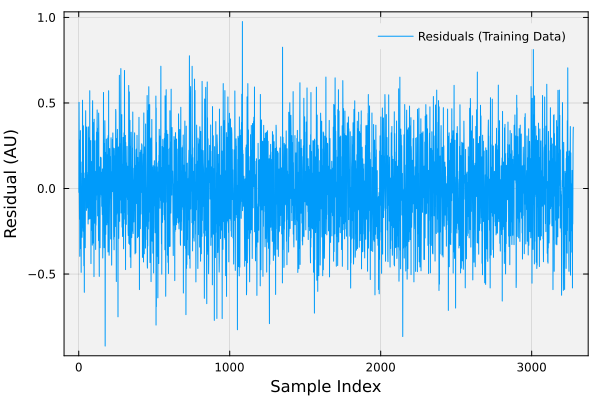

In [38]:
let

    p = vcat(γ, log(α))
    predicted_training_y_reg = training.X * p; # predicted output for the training data
    y_train = training.y;
    r = y_train .- predicted_training_y_reg;
    plot(r, label="Residuals (Training Data)")
    plot!(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent);
    xlabel!("Sample Index")
    ylabel!("Residual (AU)")
end

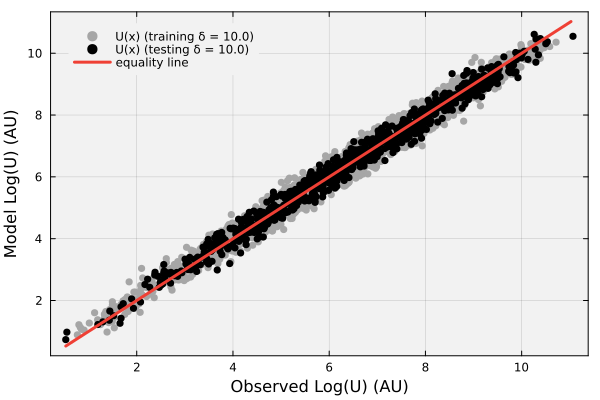

In [39]:
let

    # initialize -
    p = vcat(γ, log(α));
    p = θ̂; # use estimated parameters
    predicted_training_y_reg = training.X * p; # predicted output for the training data
    predicted_testing_y_reg = testing.X * p; # predicted output for the testing data

    # initialize -
    y_train = training.y;
    ŷ_train = predicted_training_y_reg;
    y_test = testing.y;
    ŷ_test = predicted_testing_y_reg;

    dv = [ŷ_train ; y_train ; ŷ_test ; y_test];
    L = minimum(dv);
    U = maximum(dv);
    xy_line = L:0.1:U |> collect; 

    scatter(y_train,ŷ_train,label="U(x) (training δ = $(δ))",c=:gray65, msc=:gray65)
    scatter!(y_test,ŷ_test,label="U(x) (testing δ = $(δ))",c=:black, msc=:black)
    plot!(xy_line,xy_line,lw=3, label="equality line", c=colorant"#EF4035")
    

    xlabel!("Observed Log(U) (AU)", fontsize=18)
    ylabel!("Model Log(U) (AU)", fontsize=18)
    plot!(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent);
end

## Task 3: Cross-Validation to Estimate Optimal Regularization Parameter
In this task, we'll implement a cross-validation algorithm to estimate the optimal regularization parameter `δ`. Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

### The Cross-Validation Approach
In **k-fold cross-validation**, we divide the training data into `k` equally-sized folds. For each fold:
1. We use that fold as a validation set
2. Train the model on the remaining `k-1` folds
3. Compute the prediction error on the validation fold

We repeat this for all `k` folds and average the errors. This gives us an estimate of how well the model generalizes for a given regularization parameter `δ`.

> **The Algorithm**: We'll test multiple values of `δ` and select the one that minimizes the average cross-validation error. This helps us find the sweet spot between underfitting (too much regularization) and overfitting (too little regularization).

Let's implement this algorithm step by step.

First, let's define the range of regularization parameters we want to test. We'll use a logarithmic scale to cover several orders of magnitude.

In [ ]:
δ_values = 10.0 .^ range(-2, 3, length=50); # test δ from 0.01 to 1000

Now, let's implement the k-fold cross-validation algorithm. We'll:
1. Split the training data into `k` folds
2. For each value of `δ`, perform k-fold cross-validation
3. Compute the mean squared error (MSE) for each fold
4. Average the MSE across all folds

In [ ]:
cv_results = let

    # initialize -
    X_train = training.X;
    y_train = training.y;
    n_samples = size(X_train, 1);
    n_params = size(X_train, 2);
    k = 5; # number of folds
    
    # Shuffle the indices
    shuffled_indices = randperm(n_samples);
    
    # Calculate fold size
    fold_size = div(n_samples, k);
    
    # Store results for each δ
    mean_cv_errors = zeros(length(δ_values));
    std_cv_errors = zeros(length(δ_values));
    
    # Loop over each regularization parameter
    for (idx, δ_test) in enumerate(δ_values)
        
        # Store MSE for each fold
        fold_errors = zeros(k);
        
        # Perform k-fold cross-validation
        for fold in 1:k
            
            # Define validation indices for this fold
            val_start = (fold - 1) * fold_size + 1;
            val_end = (fold == k) ? n_samples : fold * fold_size; # last fold gets remainder
            val_indices = shuffled_indices[val_start:val_end];
            
            # Training indices are all indices except validation
            train_indices = setdiff(shuffled_indices, val_indices);
            
            # Split data into train and validation sets
            X_fold_train = X_train[train_indices, :];
            y_fold_train = y_train[train_indices];
            X_fold_val = X_train[val_indices, :];
            y_fold_val = y_train[val_indices];
            
            # Train ridge regression model on this fold
            θ_fold = inv(transpose(X_fold_train) * X_fold_train + δ_test * I(n_params)) * 
                     transpose(X_fold_train) * y_fold_train;
            
            # Predict on validation set
            y_fold_pred = X_fold_val * θ_fold;
            
            # Compute MSE for this fold
            fold_errors[fold] = mean((y_fold_val .- y_fold_pred).^2);
        end
        
        # Store mean and std of CV errors for this δ
        mean_cv_errors[idx] = mean(fold_errors);
        std_cv_errors[idx] = std(fold_errors);
    end
    
    # Return results
    (δ_values = δ_values, mean_errors = mean_cv_errors, std_errors = std_cv_errors);
end;

Let's find the optimal regularization parameter - the one that minimizes the cross-validation error.

In [ ]:
δ_optimal = let
    
    # Find the index of minimum CV error
    min_idx = argmin(cv_results.mean_errors);
    
    # Get the optimal δ
    δ_opt = cv_results.δ_values[min_idx];
    
    println("Optimal regularization parameter: δ = $(round(δ_opt, digits=4))");
    println("Minimum CV error: $(round(cv_results.mean_errors[min_idx], digits=6))");
    
    δ_opt;
end

Now let's visualize the cross-validation results. We'll plot the mean CV error as a function of the regularization parameter `δ`, with error bars showing the standard deviation across folds.

In [ ]:
let
    
    # Plot mean CV error vs δ
    plot(cv_results.δ_values, cv_results.mean_errors, 
         xscale=:log10, 
         label="Mean CV Error",
         lw=2, 
         c=:black,
         ribbon=cv_results.std_errors,
         fillalpha=0.3)
    
    # Mark the optimal δ
    scatter!([δ_optimal], [cv_results.mean_errors[argmin(cv_results.mean_errors)]], 
             label="Optimal δ = $(round(δ_optimal, digits=3))",
             c=colorant"#EF4035",
             ms=8,
             markerstroke=2)
    
    xlabel!("Regularization Parameter (δ)", fontsize=14)
    ylabel!("Mean Cross-Validation Error (MSE)", fontsize=14)
    title!("K-Fold Cross-Validation Results")
    plot!(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent)
end

### Train Final Model with Optimal δ
Now that we've found the optimal regularization parameter, let's train a final model on the entire training set using `δ_optimal` and evaluate its performance on both the training and testing sets.

In [ ]:
θ̂_optimal = let

    # initialize -
    X = training.X;
    y = training.y;
    p = size(X,2); # number of parameters

    # compute the ridge regression parameters with optimal δ -
    θ_ridge_optimal = inv(transpose(X)*X + δ_optimal*I(p))*transpose(X)*y;
    θ_ridge_optimal; # return
end;

Let's compare the parameters estimated with the optimal `δ` to the true parameters and the parameters we estimated earlier with `δ = 10.0`.

In [ ]:
let 
    
    # initialize -
    df = DataFrame();
    number_of_parameters = length(θ̂_optimal);

    # build true parameter vector array -
    θ_true = vcat(γ, log(α));

    # fill the data frame -
    for i ∈ 1:number_of_parameters
        row_df = (
            Parameter = "θ[$i]",
            True = θ_true[i],
            EstimatedδFixed = θ̂[i],
            EstimatedδOptimal = θ̂_optimal[i],
            ErrorFixed = θ̂[i] - θ_true[i],
            ErrorOptimal = θ̂_optimal[i] - θ_true[i]
        );
        push!(df, row_df);
    end

    pretty_table(
         df;
         backend = :text,
         table_format = TextTableFormat(borders = text_table_borders__compact)
    );
end

Finally, let's visualize the predictions using the optimal `δ` and compare them to our earlier results.

In [ ]:
let

    # initialize -
    predicted_training_y_optimal = training.X * θ̂_optimal; 
    predicted_testing_y_optimal = testing.X * θ̂_optimal; 
    predicted_training_y_fixed = training.X * θ̂;
    predicted_testing_y_fixed = testing.X * θ̂;

    # data vectors -
    y_train = training.y;
    ŷ_train_opt = predicted_training_y_optimal;
    ŷ_train_fixed = predicted_training_y_fixed;
    y_test = testing.y;
    ŷ_test_opt = predicted_testing_y_optimal;
    ŷ_test_fixed = predicted_testing_y_fixed;

    # compute R² for both models
    R2_train_opt = 1 - sum((y_train .- ŷ_train_opt).^2) / sum((y_train .- mean(y_train)).^2);
    R2_test_opt = 1 - sum((y_test .- ŷ_test_opt).^2) / sum((y_test .- mean(y_test)).^2);
    R2_train_fixed = 1 - sum((y_train .- ŷ_train_fixed).^2) / sum((y_train .- mean(y_train)).^2);
    R2_test_fixed = 1 - sum((y_test .- ŷ_test_fixed).^2) / sum((y_test .- mean(y_test)).^2);

    dv = [ŷ_train_opt ; y_train ; ŷ_test_opt ; y_test];
    L = minimum(dv);
    U = maximum(dv);
    xy_line = L:0.1:U |> collect; 

    # Plot with optimal δ
    scatter(y_train, ŷ_train_opt, 
            label="Training (δ_opt = $(round(δ_optimal, digits=2)), R² = $(round(R2_train_opt, digits=3)))",
            c=:gray65, msc=:gray65, alpha=0.6)
    scatter!(y_test, ŷ_test_opt, 
             label="Testing (δ_opt = $(round(δ_optimal, digits=2)), R² = $(round(R2_test_opt, digits=3)))",
             c=:black, msc=:black, alpha=0.6)
    
    # Add fixed δ for comparison (with different marker shape)
    scatter!(y_train, ŷ_train_fixed, 
            label="Training (δ = $(δ), R² = $(round(R2_train_fixed, digits=3)))",
            c=:lightblue, msc=:blue, alpha=0.4, marker=:square)
    scatter!(y_test, ŷ_test_fixed, 
             label="Testing (δ = $(δ), R² = $(round(R2_test_fixed, digits=3)))",
             c=:lightcoral, msc=:red, alpha=0.4, marker=:square)
    
    plot!(xy_line, xy_line, lw=3, label="Equality line", c=colorant"#EF4035")
    
    xlabel!("Observed Log(U) (AU)", fontsize=14)
    ylabel!("Model Log(U) (AU)", fontsize=14)
    title!("Model Performance: Optimal vs Fixed δ")
    plot!(bg="gray95", background_color_outside="white", framestyle = :box, 
          fg_legend = :transparent, legend=:topleft, legendfontsize=8)
end

___
## Summary
In this lab, we implemented k-fold cross-validation to estimate the optimal regularization parameter for Ridge Regression. We systematically tested different values of `δ` to find the one that minimizes prediction error on held-out validation data.

> **Key takeaways:**
> * **Cross-validation prevents overfitting through systematic validation.** We implemented k-fold cross-validation to split training data into multiple folds, training on k-1 folds and validating on the remaining fold to estimate generalization error for each regularization parameter.
> * **Optimal regularization balances bias and variance.** By testing δ values across several orders of magnitude and selecting the one with minimum cross-validation error, we found the sweet spot that neither underfits (too much regularization) nor overfits (too little regularization).
> * **Data-driven hyperparameter selection improves model performance.** The cross-validation approach identified an optimal δ that produced better parameter estimates and prediction accuracy compared to an arbitrary fixed choice, as demonstrated by improved R² scores on the test set.

__Where do we go from here?__ Cross-validation is a fundamental technique in machine learning that extends beyond Ridge Regression. The same approach can be used to tune hyperparameters for other regularization methods (Lasso, Elastic Net), neural networks, or any model with tunable parameters. Advanced variations like stratified k-fold, leave-one-out, or nested cross-validation provide even more robust performance estimation for different scenarios.
___